In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load our train data csv file with pandas

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
original_train = train_data.copy()

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
# fill missing age values with the mean
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [53]:
# fill in missing embarked values in train and fare value in test
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [58]:
train_data.isnull().sum()
# test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### 3 types of variables:
* continuous: essentially numeric features that can take any numeric value, i.e. age or fare in this data set. They can be used immediately in the ML model
* ordinal: similar to categorical variables but they show order, i.e. pclass (even though it does not really show order)
* categorical: can be categorized into 2+ categories, i.e. sex.

### The data needs to be transformed into a numeric representation in order to be applicable in an ML model.
* How? Change strings to numeric values
* want to end up with a dataframe in which each column is a feature and the target variable is the last feature in the df

## 1. look at the already given numerical features

In [12]:
num_attributes = ['Age', 'Fare']

In [59]:
# adding a new column to out df
num_features_train = train_data[num_attributes]
num_features_test = test_data[num_attributes]

In [60]:
# display the first 10 items of the df of numerical features
num_features_train.head(10)

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
5,29.699118,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708


In [61]:
num_features_test.head()

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


## 2. categorical features

In [62]:
sex_attribute_train = train_data[['Sex']]
sex_attribute_test = test_data[['Sex']]

In [64]:
# sex_attribute_train.head()
sex_attribute_test.head()

,Sex
0,male
1,female
2,male
3,male
4,female


In [65]:
sex_attribute_train = pd.get_dummies(sex_attribute_train)
sex_attribute_test = pd.get_dummies(sex_attribute_test)

In [66]:
sex_attribute_test.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


Above, a method called one hot encoding was applied. This method get_dummies() creates a column of each category in the variable and fills it up with 1 for the respective category. 

In [68]:
embark_attr_train = train_data[['Embarked']]
embark_attr_train = pd.get_dummies(embark_attr_train)
embark_attr_train.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [69]:
embark_attr_test = test_data[['Embarked']]
embark_attr_test = pd.get_dummies(embark_attr_test)
embark_attr_test.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [70]:
# combine categorical features
category_features_train = sex_attribute_train.join(embark_attr_train)
category_features_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [71]:
# combine categorical features
category_features_test = sex_attribute_test.join(embark_attr_test)
category_features_test.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1


### 3. Ordinal Features

In [72]:
pclass_attr_train = train_data[['Pclass']]
pclass_attr_test = test_data[['Pclass']]

In [73]:
pclass_attr_test.head()

,Pclass
0,3
1,3
2,2
3,3
4,3


In [76]:
pclass_attr_test.head()

,Pclass
0,3
1,3
2,2
3,3
4,3


### Now merge this data with our numeric attributes to create a useable dataset for a machine learning model

In [77]:
# combine category, ordinal, and numerical features into one df
df_ml_features_train = num_features_train.join(category_features_train)
df_ml_features_train = df_ml_features_train.join(pclass_attr_train)

In [78]:
df_ml_features_train.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass
0,22.0,7.2500,0,1,0,0,1,3
1,38.0,71.2833,1,0,1,0,0,1
2,26.0,7.9250,1,0,0,0,1,3
3,35.0,53.1000,1,0,0,0,1,1
4,35.0,8.0500,0,1,0,0,1,3


In [79]:
# combine category, ordinal, and numerical features into one df
df_ml_features_test = num_features_test.join(category_features_test)
df_ml_features_test = df_ml_features_test.join(pclass_attr_test)
df_ml_features_test.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass
0,34.5,7.8292,0,1,0,1,0,3
1,47.0,7.0000,1,0,0,0,1,3
2,62.0,9.6875,0,1,0,1,0,2
3,27.0,8.6625,0,1,0,0,1,3
4,22.0,12.2875,1,0,0,0,1,3


### New features

In [80]:
## hasCabin
# Feature that tells whether a passenger had a cabin on the Titanic
df_ml_features_train['hasCabin'] = train_data['Cabin'].apply(lambda x:0 if type(x) == float else 1)
df_ml_features_train.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin
0,22.0,7.2500,0,1,0,0,1,3,0
1,38.0,71.2833,1,0,1,0,0,1,1
2,26.0,7.9250,1,0,0,0,1,3,0
3,35.0,53.1000,1,0,0,0,1,1,1
4,35.0,8.0500,0,1,0,0,1,3,0


In [81]:
df_ml_features_test['hasCabin'] = test_data['Cabin'].apply(lambda x:0 if type(x) == float else 1)
df_ml_features_test.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin
0,34.5,7.8292,0,1,0,1,0,3,0
1,47.0,7.0000,1,0,0,0,1,3,0
2,62.0,9.6875,0,1,0,1,0,2,0
3,27.0,8.6625,0,1,0,0,1,3,0
4,22.0,12.2875,1,0,0,0,1,3,0


In [82]:
# graph this feature
df_ml_features_train['Survived'] = train_data['Survived']
df_ml_features_train.head(3)

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin,Survived
0,22.0,7.2500,0,1,0,0,1,3,0,0
1,38.0,71.2833,1,0,1,0,0,1,1,1
2,26.0,7.9250,1,0,0,0,1,3,0,1


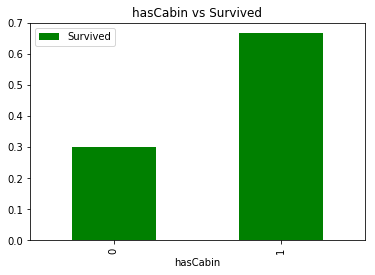

In [83]:
# show that people who have a cabin survived more often on average
df_ml_features_train[['hasCabin', 'Survived']].groupby(['hasCabin']).mean().plot.bar(title='hasCabin vs Survived', color="g")
plt.savefig('hascabin_survival.png')

In [31]:
# df_ml_features[['hasCabin', 'Survived']].groupby(['hasCabin'], as_index=False).agg(['mean', 'count', 'sum'])

In [32]:
df_ml_features_train.drop(['Survived'], 1, inplace=True)

In [33]:
df_ml_features.head(2)

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin
0,22.0,7.2500,0,1,0,0,1,3,0
1,38.0,71.2833,1,0,1,0,0,1,1


In [34]:
df_ml_features.describe()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783,2.308642,0.228956
std,13.002015,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876,0.836071,0.420397
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,29.699118,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
75%,35.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [84]:
## combine parents and children and sibsp
df_ml_features_train['FamilySize'] = train_data['Parch'] + train_data['SibSp']
df_ml_features_test['FamilySize'] = test_data['Parch'] + test_data['SibSp']

In [85]:
df_ml_features_test.head(10)

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin,FamilySize
0,34.5,7.8292,0,1,0,1,0,3,0,0
1,47.0,7.0000,1,0,0,0,1,3,0,1
2,62.0,9.6875,0,1,0,1,0,2,0,0
3,27.0,8.6625,0,1,0,0,1,3,0,0
4,22.0,12.2875,1,0,0,0,1,3,0,2
5,14.0,9.2250,0,1,0,0,1,3,0,0
6,30.0,7.6292,1,0,0,1,0,3,0,0
7,26.0,29.0000,0,1,0,0,1,2,0,2
8,18.0,7.2292,1,0,1,0,0,3,0,0
9,21.0,24.1500,0,1,0,0,1,3,0,2


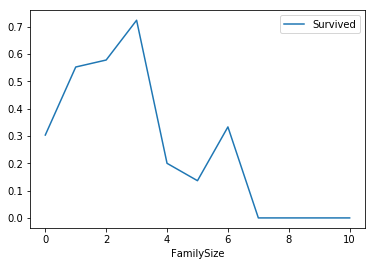

In [86]:
df_ml_features_train['Survived'] = train_data['Survived']
df_ml_features_train[['FamilySize', 'Survived']].groupby('FamilySize').mean().plot()
plt.savefig('famsize_surival.png')

In [87]:
df_ml_features_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
                mean count  sum
FamilySize                     
0           0.303538   537  163
1           0.552795   161   89
2           0.578431   102   59
3           0.724138    29   21
4           0.200000    15    3
5           0.136364    22    3
6           0.333333    12    4
7           0.000000     6    0
10          0.000000     7    0

We see that families of size 3 have the greatest chance of survival (amount 72.4%)

In [91]:
df_ml_features_train.head(2)

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin,Survived,FamilySize
0,22.0,7.2500,0,1,0,0,1,3,0,0,1
1,38.0,71.2833,1,0,1,0,0,1,1,1,1


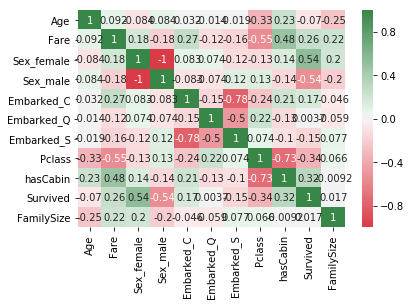

In [90]:
df_ml_features_train['Survived'] = train_data['Survived']
corr = df_ml_features_train.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(10, 133, as_cmap=True))

In [92]:
df_ml_features_train.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin,Survived,FamilySize
0,22.0,7.2500,0,1,0,0,1,3,0,0,1
1,38.0,71.2833,1,0,1,0,0,1,1,1,1
2,26.0,7.9250,1,0,0,0,1,3,0,1,0
3,35.0,53.1000,1,0,0,0,1,1,1,1,1
4,35.0,8.0500,0,1,0,0,1,3,0,0,0


We see that the correlations make more sense now after some feature engineering. 

In [95]:
# df_ml_features_train.drop(['Survived'], 1, inplace=True)
df_ml_features_train.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,hasCabin,FamilySize
0,22.0,7.2500,0,1,0,0,1,3,0,1
1,38.0,71.2833,1,0,1,0,0,1,1,1
2,26.0,7.9250,1,0,0,0,1,3,0,0
3,35.0,53.1000,1,0,0,0,1,1,1,1
4,35.0,8.0500,0,1,0,0,1,3,0,0


## ML Classification and Evaluation

In [107]:
from sklearn.model_selection import KFold


AttributeError: 'KFold' object has no attribute 'get_random_state'

### Decision Tree Classifier

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_features_train, target, 
                                                   test_size=0.2, stratify=target, random_state=42)

In [134]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(df_ml_features_train, target)

In [135]:
predictions_dt = clf.predict(X_test)
accuracy_score(y_test, predictions_dt)

0.776536312849162

### Random Forest

In [166]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

clf =  RandomForestClassifier()
clf.fit(df_ml_features_train, target)
predictions_rf = clf.predict(X_test)
print(predictions_rf[0:10])
accuracy_score(y_test,predictions_rf)

[0 0 1 0 1 1 1 0 0 0]


C:\Users\annag\Anaconda3\Lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9776536312849162

### Write Test Predictions to csv file

In [155]:
clf_test =  RandomForestClassifier()
clf_test.fit(df_ml_features_train, target)
predictions_rf_test = clf_test.predict(df_ml_features_test)
print(type(list(predictions_rf_test)))
print(list(test_data['PassengerId']))

<class 'list'>
[892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 

C:\Users\annag\Anaconda3\Lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [151]:
import csv

predictions_dict = {'PassengerId': test_data['PassengerId'] 'Survived': predictions_rf_test}
with open('submission_predictions.csv', 'w') as outfile:
    header = ['PassengerId', 'Predictions']
    writer = csv.DictWriter(outfile, header)
    writer.writeheader()
    writer.writerows(predictions_dict)

SyntaxError: invalid syntax (<ipython-input-151-7d693e375ed1>, line 3)

In [164]:
predictions = pd.DataFrame(
    {'PassengerId': list(test_data['PassengerId']),
     'Survived': list(predictions_rf_test)
    })
predictions.to_csv('predictions_group0.csv', index=False)

### Trying cross validation

In [127]:
# trying cross validation
scores = []
for counter in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(df_ml_features_train, target, 
                                                   test_size=rand(0.2), stratify=target, random_state=42)
    clf = tree.DecisionTreeClassifier(max_depth=2)
    clf = clf.fit(df_ml_features_train, target)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)

avg_accuracy = sum(scores)/len(scores)
avg_accuracy

NameError: name 'rand' is not defined

In [126]:
# trying to use Kfold
from sklearn.model_selection import KFold, cross_val_score
X = df_ml_features_train
k_fold = KFold(n_splits=5)
scores = []
for train, target in k_fold.split(X):
    clf = clf.fit(train, target)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)

print(scores)
avg_accuracy = sum(scores)/len(scores)
avg_accuracy

Train: <class 'numpy.ndarray'> | test: 179
Train: <class 'numpy.ndarray'> | test: 178
Train: <class 'numpy.ndarray'> | test: 178
Train: <class 'numpy.ndarray'> | test: 178
Train: <class 'numpy.ndarray'> | test: 178
